In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

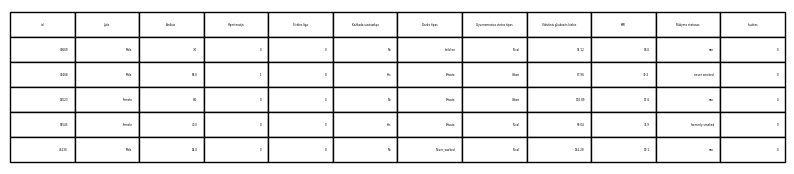

In [2]:
# Pažiūrimos pirmos duoemų rinkinio eilutės
data = pd.read_csv('dataset_original.csv')
df=data
df.head()

file_path = 'dataset_original.csv'
data = pd.read_csv(file_path)
first_few_lines = data.head() 
fig, ax = plt.subplots(figsize=(10, 2))  
ax.axis('off')
tbl = ax.table(cellText=first_few_lines.values, colLabels=first_few_lines.columns, loc='center')
tbl.scale(1, 1.5)


In [3]:
df.isnull().sum()

id                                0
Lytis                             0
Amžius                            0
Hipertenzija                      0
Širdies liga                      0
Kažkada susituokęs                0
Darbo tipas                       0
Gyvenamosios vietos tipas         0
Vidutinis gliukozės kiekis        0
KMI                            1462
Rūkymo statusas               13292
Insultas                          0
dtype: int64

In [4]:
le = LabelEncoder()
df['Lytis'] = le.fit_transform(df['Lytis'])
df['Gyvenamosios vietos tipas'] = le.fit_transform(df['Gyvenamosios vietos tipas'])
df['Kažkada susituokęs'] = le.fit_transform(df['Kažkada susituokęs'])
df['Rūkymo statusas'] = le.fit_transform(df['Rūkymo statusas'])
df['Darbo tipas'] = le.fit_transform(df['Darbo tipas'])


df = df.drop(['id'], axis=1)

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41938 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Lytis                       41938 non-null  int64  
 1   Amžius                      41938 non-null  float64
 2   Hipertenzija                41938 non-null  int64  
 3   Širdies liga                41938 non-null  int64  
 4   Kažkada susituokęs          41938 non-null  int64  
 5   Darbo tipas                 41938 non-null  int64  
 6   Gyvenamosios vietos tipas   41938 non-null  int64  
 7   Vidutinis gliukozės kiekis  41938 non-null  float64
 8   KMI                         41938 non-null  float64
 9   Rūkymo statusas             41938 non-null  int64  
 10  Insultas                    41938 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.8 MB


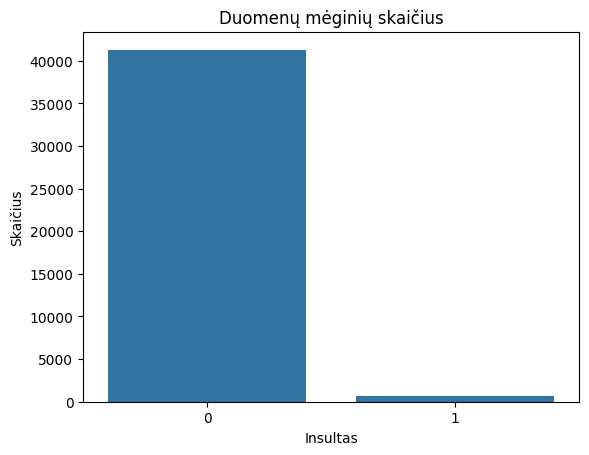

In [6]:
sns.countplot(x = 'Insultas', data = df)
plt.title("Duomenų mėginių skaičius")
plt.ylabel("Skaičius")
plt.xlabel("Insultas")
plt.show()

In [7]:
X = df.drop(['Insultas'],axis = 1)
Y = df['Insultas']
counts = Y.value_counts()

percentages = Y.value_counts(normalize=True) * 100

print("Counts of each class:")
print(counts)

print("\nPercentages of each class:")
print(percentages)

Counts of each class:
Insultas
0    41295
1      643
Name: count, dtype: int64

Percentages of each class:
Insultas
0    98.466784
1     1.533216
Name: proportion, dtype: float64


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
train_distribution = Y_train.value_counts() 
print("Training Set Distribution:\n", train_distribution)

test_distribution = Y_test.value_counts() 
print("Testing Set Distribution:\n", test_distribution)

Training Set Distribution:
 Insultas
0    28894
1      462
Name: count, dtype: int64
Testing Set Distribution:
 Insultas
0    12401
1      181
Name: count, dtype: int64


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

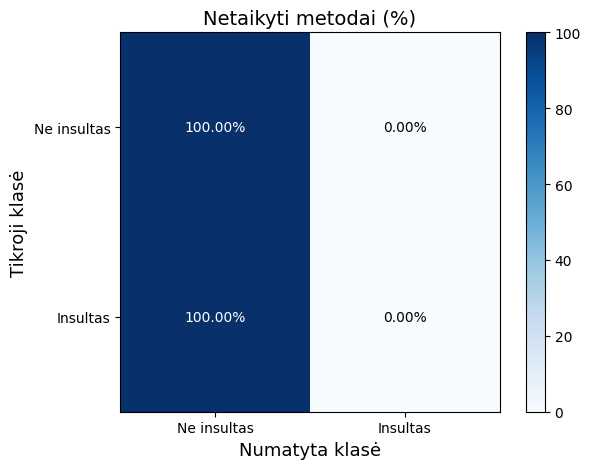

In [11]:
# Sukuriama sumaišties matrica originaliems duomenims
cm = confusion_matrix(Y_test, Y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Netaikyti metodai (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_unmodified.png", dpi=300, bbox_inches='tight')
plt.show()

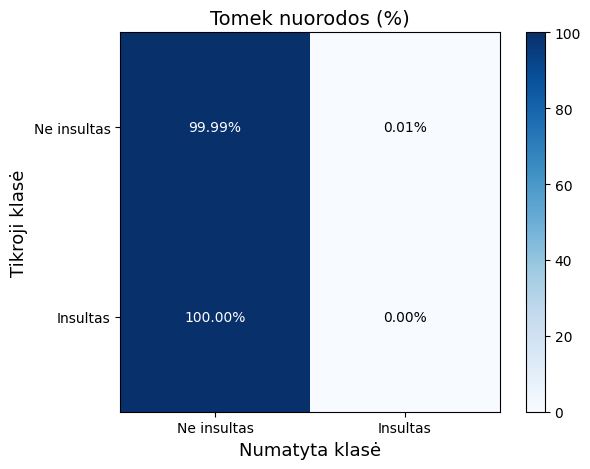

In [12]:
# Sukuriama sumaišties matrica, panaudojus Tomek nuorodas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_tomek.png", dpi=300, bbox_inches='tight')
plt.show()


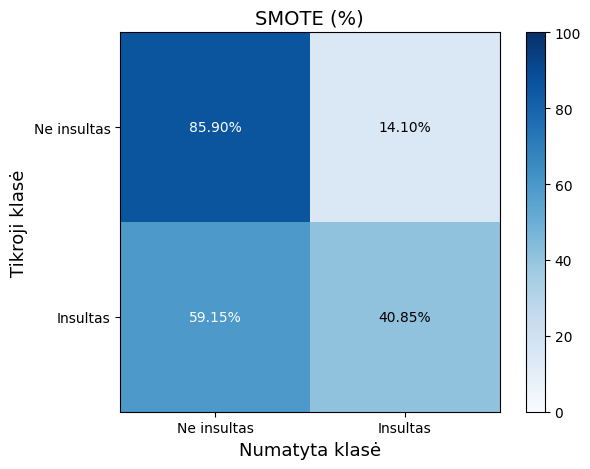

In [13]:
# Sukuriama sumaišties matrica, panaudojus SMOTE

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])
cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_smote.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

 Ne insultas       0.99      0.87      0.92     12785
    Insultas       0.05      0.38      0.09       235

    accuracy                           0.86     13020
   macro avg       0.52      0.62      0.51     13020
weighted avg       0.97      0.86      0.91     13020



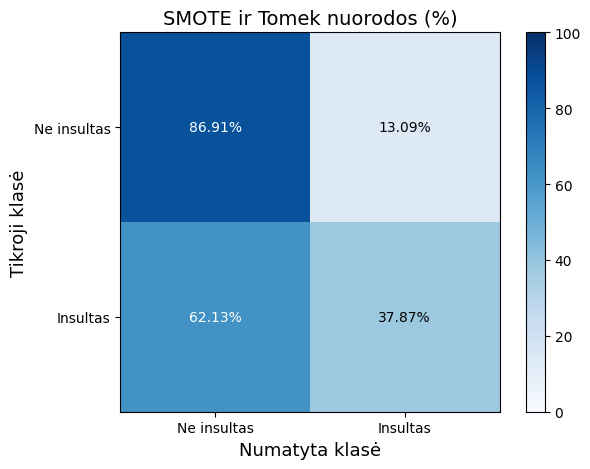

In [14]:
# Sukuriama sumaišties matrica, panaudojus SMOTE ir Tomek nuorodas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smote_tomek = SMOTETomek(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE ir Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_smote_tomek.png", dpi=300, bbox_inches='tight')
plt.show()



Classification Report:
               precision    recall  f1-score   support

 Ne insultas       0.99      0.84      0.91     12785
    Insultas       0.05      0.47      0.09       235

    accuracy                           0.83     13020
   macro avg       0.52      0.65      0.50     13020
weighted avg       0.97      0.83      0.89     13020



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


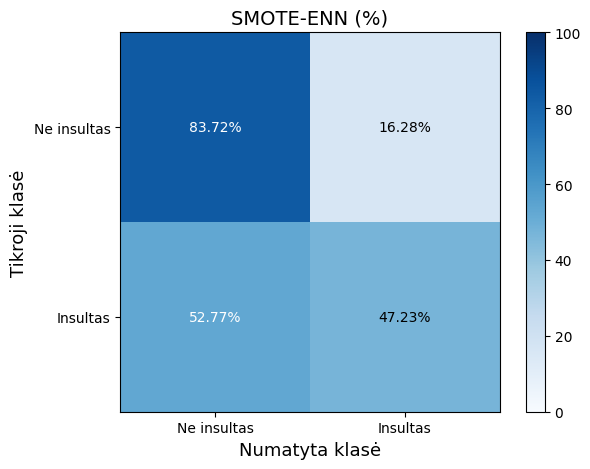

In [15]:
# Sukuriama sumaišties matrica, panaudojus SMOTE-ENN

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

smoteenn = SMOTEENN(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE-ENN (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_smote_enn.png", dpi=300, bbox_inches='tight')
plt.show()


Classification Report:
               precision    recall  f1-score   support

 Ne insultas       0.99      0.92      0.95     12785
    Insultas       0.07      0.31      0.11       235

    accuracy                           0.91     13020
   macro avg       0.53      0.61      0.53     13020
weighted avg       0.97      0.91      0.94     13020



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


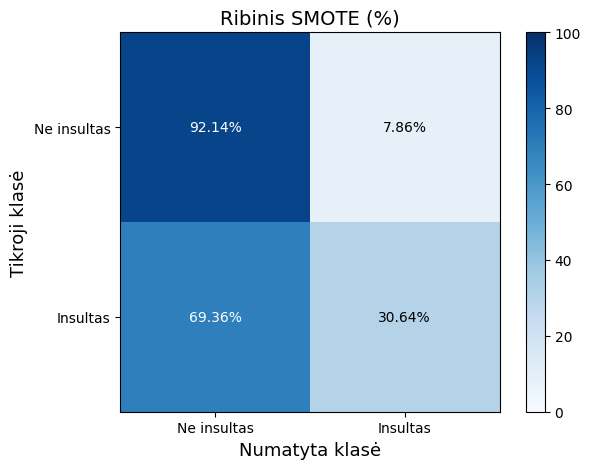

In [16]:
# Sumaišties matrica, panaudojus ribinį SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

borderline_smote = BorderlineSMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('Ribinis SMOTE (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_smote_borderline", dpi=300, bbox_inches='tight')
plt.show()



Classification Report:
               precision    recall  f1-score   support

 Ne insultas       0.99      0.84      0.91     12785
    Insultas       0.05      0.42      0.08       235

    accuracy                           0.83     13020
   macro avg       0.52      0.63      0.50     13020
weighted avg       0.97      0.83      0.89     13020



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


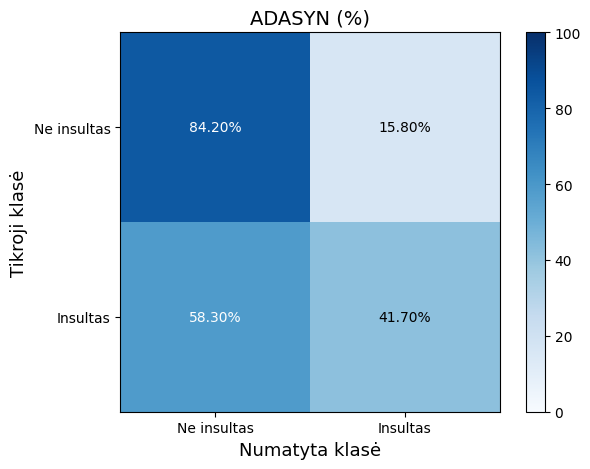

In [17]:
# Sumaišties matrica, panaudojus ADASYN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

adasyn = ADASYN(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_adasyn.png", dpi=300, bbox_inches='tight')
plt.show()


Classification Report:
               precision    recall  f1-score   support

 Ne insultas       0.99      0.86      0.92     12785
    Insultas       0.05      0.40      0.09       235

    accuracy                           0.85     13020
   macro avg       0.52      0.63      0.50     13020
weighted avg       0.97      0.85      0.90     13020



/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


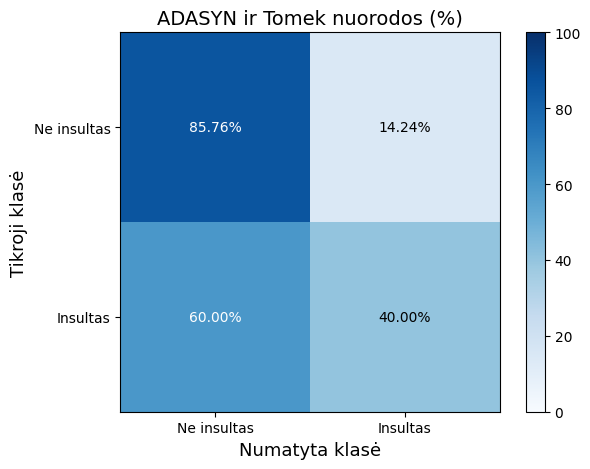

In [18]:
# Sumaišties matrica, panaudojus ADASYN ir Tomek nuorodas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('dataset_original.csv', encoding='utf-8-sig')

df.drop(columns=['id'], inplace=True)

num_imputer = SimpleImputer(strategy='mean')
df['KMI'] = num_imputer.fit_transform(df[['KMI']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df['Rūkymo statusas'] = cat_imputer.fit_transform(df[['Rūkymo statusas']]).ravel()

categorical_cols = ['Lytis', 'Gyvenamosios vietos tipas', 'Kažkada susituokęs', 'Rūkymo statusas', 'Darbo tipas']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(columns=['Insultas'])
y = df['Insultas']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

adasyn = ADASYN(sampling_strategy=0.99, random_state=7)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_resampled, y_resampled)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

test_preds = mlp.predict(X_test)
report = classification_report(y_test, test_preds, target_names=['Ne insultas', 'Insultas'])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN ir Tomek nuorodos (%)', fontsize=14)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.set_yticklabels(['Ne insultas', 'Insultas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("stroke_adasyn_tomek.png", dpi=300, bbox_inches='tight')
plt.show()
